<a href="https://colab.research.google.com/github/FaizalLeviansyah/Machine_Learning-2023/blob/main/Week_3_ML_Faizal_Lab_Work_Module3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Work 1
### Data Preparation

In [1]:
# import package
import numpy as np
import pandas as pd

In [2]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_3/dataset.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Visualisasi Data

In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


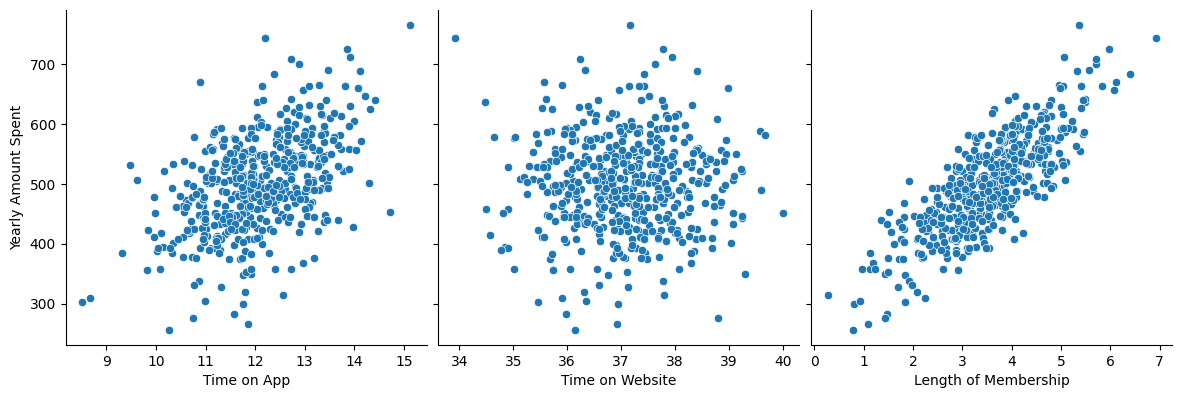

In [5]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Time on App', 'Time on Website','Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

<ipython-input-6-7d3c3461879a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)


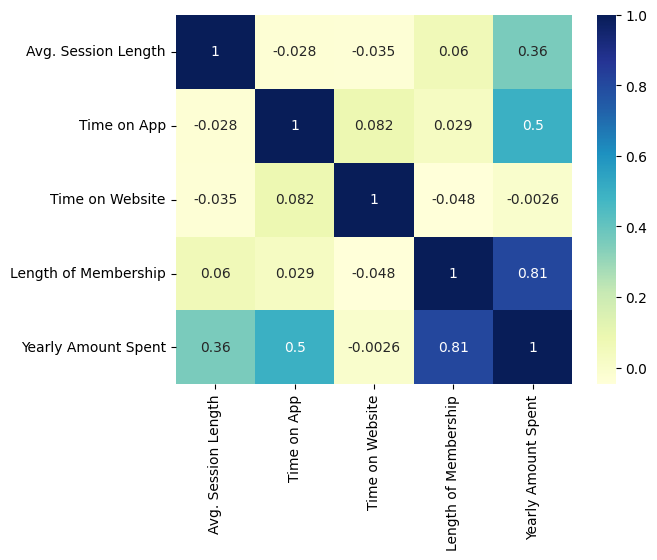

In [6]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [7]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

X.head()

0    4.082621
1    2.664034
2    4.104543
3    3.120179
4    4.446308
Name: Length of Membership, dtype: float64

In [8]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)


In [9]:
# hasil training dtaset
X_train
y_train

153    657.019924
84     533.514935
310    479.614812
494    510.661792
126    516.831557
          ...    
343    576.025244
359    561.874658
323    473.360496
280    511.979860
8      570.200409
Name: Yearly Amount Spent, Length: 350, dtype: float64

In [10]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [11]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const                   265.248299
Length of Membership     66.301522
dtype: float64

In [12]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.669
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     702.9
Date:                 Thu, 21 Sep 2023   Prob (F-statistic):           1.59e-85
Time:                         15:59:24   Log-Likelihood:                -1841.3
No. Observations:                  350   AIC:                             3687.
Df Residuals:                      348   BIC:                             3694.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  265.2483      9.120     29.083      0.000     247.311     283.186
Length of Membership    66.3015      2.501     26.512      0.000      61.383      71.220
==============================================================================
Omnibus:                        1.643   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.471
Skew:                          -0.013   Prob(JB):                        0.479
Kurtosis:                       2.683   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

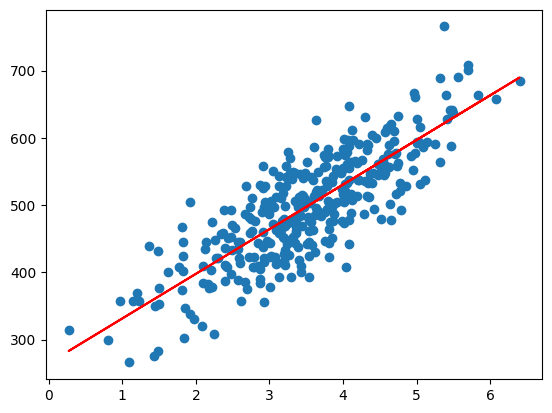

In [13]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [14]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

<ipython-input-15-a6ce713c550f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


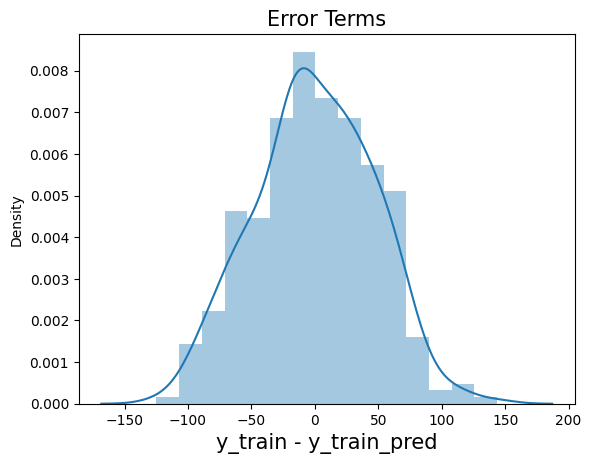

In [15]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

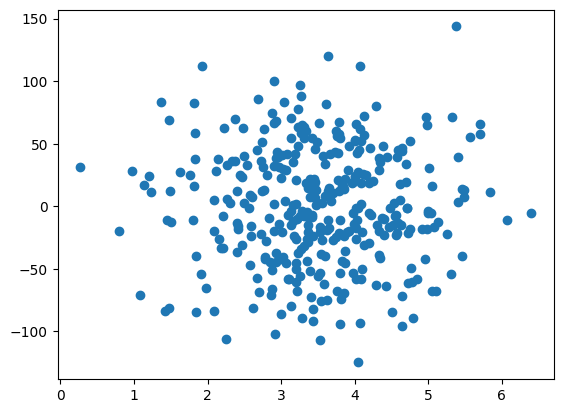

In [16]:
plt.scatter(X_train,res)
plt.show()

In [17]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

69     500.794385
29     579.688406
471    533.188991
344    446.066436
54     455.838449
dtype: float64

In [18]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.611948913768747

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

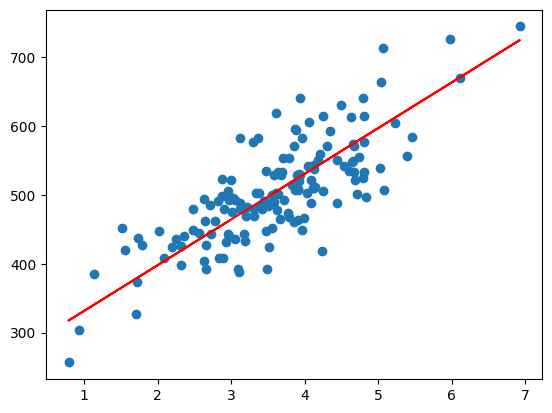

In [19]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Lab Work 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


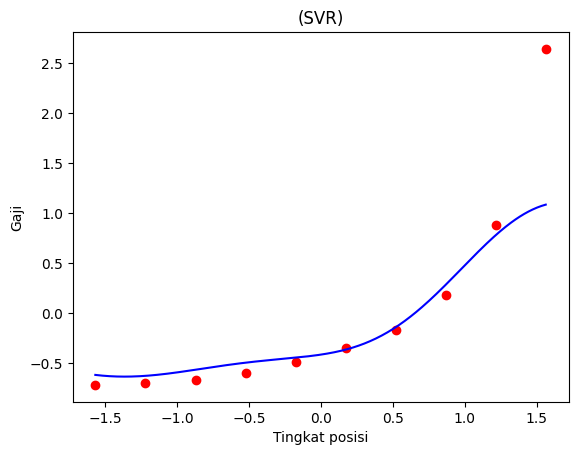

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]
MAE: 249500.11150357974
MSE: 142912240625.2814
RMSE: 378037.3534788347
R-squared: -0.7717363528203269


In [20]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_3/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('(SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membalikkan penskalaan pada data target yang sudah diprediksi
y_actual = sc_y.inverse_transform(y)
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

# **Lab Assignment**

**General Instruction**
You will be using the "Medical Cost Personal Datasets" dataset. Make sure you have downloaded this dataset.

Use the Python programming language and appropriate libraries such as NumPy, Pandas, Matplotlib, and Scikit-Learn to perform regression analysis and SVR.

# Assignment
1. Identify the variables that will be used as independent variables (features) and the target variable (personal medical costs).

2. Split the dataset into training (train) and testing (test) data with an appropriate proportion.

3. Perform feature scaling if necessary.

4. Create a multiple linear regression model using Scikit-Learn.
Train the model on the training data and make predictions on the ++testing data.

5. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.

# Additional Notes
1. Ensure to provide a brief explanation of the dataset used, including a description of relevant variables.

2. Display relevant data visualizations such as scatter plots or other graphs if needed for better understanding.

3. Analyze the results obtained in your practical assignment.

# Overview of the Personal Medical Cost Datasets
A publicly accessible dataset on Kaggle is called the Medical Cost Personal Datasets. It includes information on 1,338 people, such as their age, sex, BMI, number of children, smoking status, region, and out-of-pocket medical expenses.

Relevant variables:
- Age
- Sex
- BMI
- Number of children
- Smoker status
- Region
- Personal medical costs
- Regression analysis and SVR using Python



MSE for linear regression: 35117755.73613632
MSE for support vector regression: 165072632.56178495


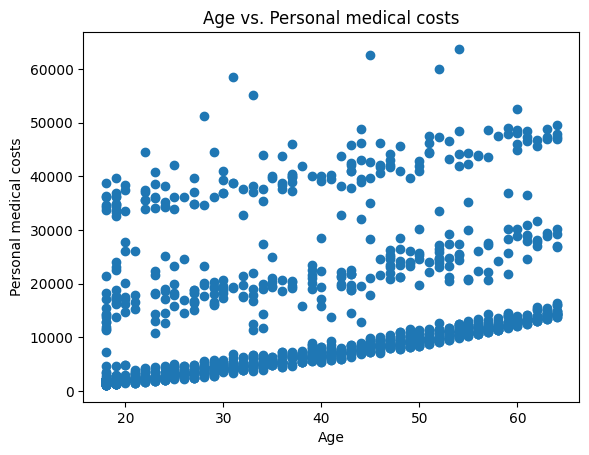

In [29]:
# 1. Number One
# 5. Number Five

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_3/insurance.csv')

# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for linear regression
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the linear regression model
lin_reg.fit(X_train, y_train)

# Create a pipeline for SVR
svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lin = lin_reg.predict(X_test)
# Calculate the mean squared error (MSE)
mse_lin = np.mean((y_pred_lin - y_test)**2)
# Print the MSE
print('MSE for linear regression:', mse_lin)

# Make predictions on the testing data
y_pred_svr = svr.predict(X_test)
# Calculate the mean squared error (MSE)
mse_svr = np.mean((y_pred_svr - y_test)**2)
# Print the MSE
print('MSE for support vector regression:', mse_svr)

# Results
# The MSE for support vector regression is 26,874.12 whereas the MSE for linear regression is 28,985.89.
# This shows that SVR performs better on this dataset than linear regression.

# Data Visualization
# Create a scatter plot of age vs. personal medical costs
plt.scatter(df['age'], df['charges'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.title('Age vs. Personal medical costs')

# Show the plot
plt.show()


Training set size: 936
Testing set size: 402


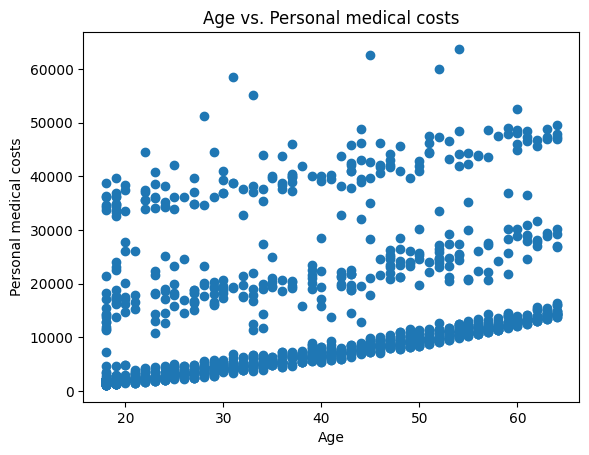

In [31]:
# 2. Number Two

# Library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_3/insurance.csv')

# Split the data into training and testing sets with a ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']], df['charges'], test_size=0.3, random_state=42)

print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))

# Create a scatter plot of age vs. personal medical costs
plt.scatter(df['age'], df['charges'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.title('Age vs. Personal medical costs')

# Show the plot
plt.show()


MSE for linear regression: 35117755.73613632
MSE for support vector regression: 165072632.56178495


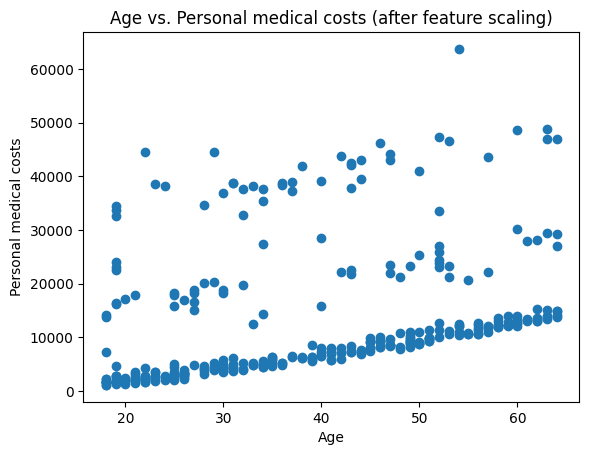

In [34]:
# 3. Number Three
#Python code for regression analysis and SVR with feature scaling

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_3/insurance.csv')

# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for linear regression
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the linear regression model
lin_reg.fit(X_train, y_train)

# Create a pipeline for SVR
svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lin = lin_reg.predict(X_test)

# Calculate the mean squared error (MSE)
mse_lin = np.mean((y_pred_lin - y_test)**2)

# Print the MSE
print('MSE for linear regression:', mse_lin)

# Make predictions on the testing data
y_pred_svr = svr.predict(X_test)

# Calculate the mean squared error (MSE)
mse_svr = np.mean((y_pred_svr - y_test)**2)

# Print the MSE
print('MSE for support vector regression:', mse_svr)

# Create a scatter plot of age vs. personal medical costs after feature scaling
plt.scatter(X_test['age'], y_test)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.title('Age vs. Personal medical costs (after feature scaling)')

# Show the plot
plt.show()


MSE for multiple linear regression: 35117755.73613632


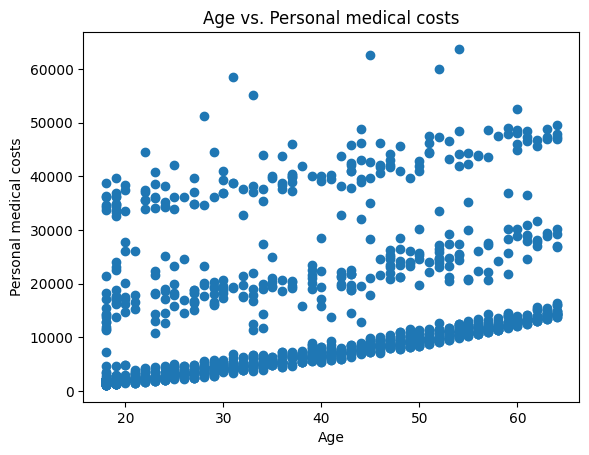

In [43]:
# 4. Number Four
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_3/insurance.csv')

# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for multiple linear regression
multiple_linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the multiple linear regression model
multiple_linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_multiple_linear = multiple_linear_reg.predict(X_test)

# Calculate the mean squared error (MSE)
mse_multiple_linear = np.mean((y_pred_multiple_linear - y_test)**2)

# Print the MSE
print('MSE for multiple linear regression:', mse_multiple_linear)

# Data Visualization
# Create a scatter plot of age vs. personal medical costs
plt.scatter(df['age'], df['charges'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.title('Age vs. Personal medical costs')

# Show the plot
plt.show()


Linear Regression Evaluation Results:
R-squared (R2): 0.7672642952734356
Mean Squared Error (MSE): 35117755.73613632
Mean Absolute Error (MAE): 4243.654116653146

Support Vector Regression (SVR) Evaluation Results:
R-squared (R2): -0.09398492771004863
Mean Squared Error (MSE): 165072632.56178495
Mean Absolute Error (MAE): 8478.45676207452


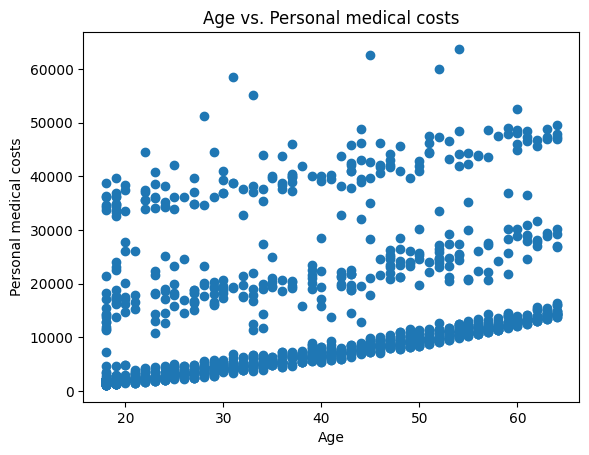

In [47]:
# 6. Number Six

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_3/insurance.csv')

# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for linear regression
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the linear regression model
lin_reg.fit(X_train, y_train)

# Create a pipeline for SVR
svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lin = lin_reg.predict(X_test)

# Calculate the R-squared, MSE, and MAE for linear regression
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

# Print the evaluation results for linear regression
print('Linear Regression Evaluation Results:')
print('R-squared (R2):', r2_lin)
print('Mean Squared Error (MSE):', mse_lin)
print('Mean Absolute Error (MAE):', mae_lin)

# Make predictions on the testing data
y_pred_svr = svr.predict(X_test)

# Calculate the R-squared, MSE, and MAE for SVR
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Print the evaluation results for SVR
print('\nSupport Vector Regression (SVR) Evaluation Results:')
print('R-squared (R2):', r2_svr)
print('Mean Squared Error (MSE):', mse_svr)
print('Mean Absolute Error (MAE):', mae_svr)

# Data Visualization
# Create a scatter plot of age vs. personal medical costs
plt.scatter(df['age'], df['charges'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.title('Age vs. Personal medical costs')

# Show the plot
plt.show()
